# Supervised Classification

---
This task covers the following modules:
> 1.  Classification I - $k$-nearest neighbors and logistic regression
> 2.  Classification II - Support Vector Machines
---

datasets used:

1.  Cancer dataset
2.  Iris dataset

Import the necessary libraries.

In [74]:
#### TODO: Write your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Importing, Preprocessing and Feature Selection

Import the (Wisconsin) `breast cancer dataset` from the `sklearn` library as a Pandas DataFrame.

It is a multivariate data intended for classification tasks.

In [75]:
#### Load the dataset
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()

#### Write your code here
df = pd.DataFrame(np.c_[bc_data['data'], bc_data['target']], columns=np.append(bc_data['feature_names'], ['target']))

#Showing first 10 rows of the generated dataframe
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


### 1.1 Data Preprocessing & Displaying


1.  How should you preprocess the multivariate data before any analysis? Do it using the `sklearn` library. Then, show the dataset.

In [76]:
#### Data Precessing & Displaying
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Write your code here
nan = df[df.isnull().any(axis=1)] #Checking if any Nan values are present in dataframe

if len(nan) == 0:
    print('No Nan values in data')
else:
    print(nan)

ss = StandardScaler()

# Standardizing data to center it around mean (mean becomes 0 and std dev is 1)
data_scaled = ss.fit_transform(bc_data['data']) 

df_scaled = pd.DataFrame(np.c_[data_scaled, bc_data['target']], columns=np.append(bc_data['feature_names'], ['target']))

# Showing first 10 rows of dataset
df_scaled.head(10)

No Nan values in data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,0.0
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,0.0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,0.0
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,0.0
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,0.0


### 1.2 Feature Selection

Select two variables: `mean radius` and `mean concavity` in addition to the `target` variable.

In [77]:
#### TODO: Write your code here
features = df_scaled[['mean radius', 'mean concavity', 'target']]
features

,mean radius,mean concavity,target
0,1.097064,2.652874,0.0
1,1.829821,-0.023846,0.0
2,1.579888,1.363478,0.0
3,-0.768909,1.915897,0.0
4,1.750297,1.371011,0.0
...,...,...,...
564,2.110995,1.947285,0.0
565,1.704854,0.693043,0.0
566,0.702284,0.046588,0.0
567,1.838341,3.296944,0.0


### 1.3 Splitting into training and test dataset

Split the shuffled data into training and test sets. Reserve $30\%$ as the test dataset.

Use `random_state=1` for reproducibility.

In [78]:
#### TODO: Write your code here
F = np.array(features.values)
X = F[:, :-1]
y = F[:,-1]
# setting random_state to 1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Displaying shape and first 10 rows of training set
print(X_train.shape)
print(f'First 10 rows of X_train:\n {X_train[:10,:]}')

# Displaying shape and first 10 rows of test set
print(X_test.shape)
print(f'First 10 rows of X_test:\n {X_test[:10,:]}')

(398, 2)
First 10 rows of X_train:
 [[-0.74050787 -0.57149369]
 [-0.30596615 -1.1061848 ]
 [ 0.02065018 -0.47921466]
 [-0.58430006 -0.64016939]
 [-0.71494659 -0.22384654]
 [-1.25173342 -1.11487284]
 [-0.50761623 -0.7434968 ]
 [ 0.2251404  -0.41945299]
 [-2.0296483  -1.11487284]
 [-0.73482758 -0.26904444]]
(171, 2)
First 10 rows of X_test:
 [[ 0.15981713  0.70559797]
 [-0.27188444  0.42436661]
 [-0.33436757 -0.34211437]
 [ 1.18794852 -0.08925725]
 [ 0.28478338 -0.5265469 ]
 [ 0.577318    0.19461064]
 [ 1.43788102  0.38293521]
 [ 1.12262526  0.26994047]
 [-1.03588263 -0.50834219]
 [ 0.11437486 -0.24920759]]


## 2. $k$-nearest neighbors

Let's start with $k$-nearest neighbors to classify the the data.

1.  Construct a $k$-nearest neighbors classifier.


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### TODO: Write your code here
score = {}
s_list = []

for k in range(1, 200):
    k_classifier = KNeighborsClassifier(n_neighbors=k)
    k_classifier.fit(X_train, y_train)
    y_pred = k_classifier.predict(X_test)
    score[k] = metrics.accuracy_score(y_test, y_pred)
    s_list.append(score[k])


2.  Plot the variation of accuracy over the value of $k$, the number of nearest neighbors. What can you infer from it?

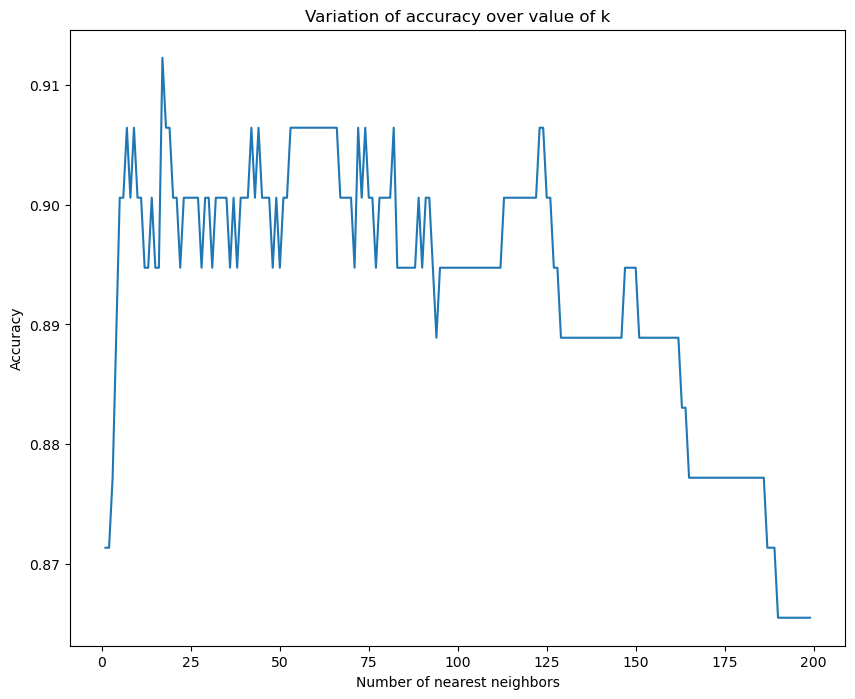

In [80]:
#### TODO: Write your code here
plt.figure(figsize=(10  ,8))
plt.plot(range(1, 200), s_list)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy over value of k')
plt.show()

`Based on the accuracy vs number of neighbors plot, it can be inferred that as number of nearest neighbors get closer to total number of data points, the overall accuracy of the model starts dropping.` 

3. What is the optimal value of $k$, the number of nearest neighbors? What does $k$ signify? 

In [81]:
#### TODO: Write your code here
# optimal value of k
k = np.argmax(s_list)
print(f'The optimal value of k for which overall accuracy is maximum = {k} and the max. accuracy obtained is {(s_list[k]*100):.3f}%')


The optimal value of k for which overall accuracy is maximum = 16 and the max. accuracy obtained is 91.228%


`k signifies the number of nearest neighbors that influence the predictions. Higher value of k can reduce the overall accuracy of the model but a very small value could lead to sub optimal model which could impact accuracy as well. Thus, choosing an appropriate value of k is vital for efficiency of knn classifier model.`  

4.  Construct and display the confusion matrix for the train and test datasets corresponding to the optimal $k$.

In [82]:
#### TODO: Write your code here

# constructing classifier for optimal k value
k_classifier = KNeighborsClassifier(n_neighbors=k)
k_classifier.fit(X_train, y_train)
y_pred = k_classifier.predict(X_test)

# Confusion matrix for test data corresponding to optimal k
cf_mat_test = metrics.confusion_matrix(y_test, y_pred)

#Displaying the confusion matrix
print(f'For test data, the confusion matrix for k={k} is: \n{cf_mat_test}')

For test data, the confusion matrix for k=16 is: 
[[55  8]
 [10 98]]


In [83]:
#### TODO: Write your code here

# constructing classifier for optimal k value
k_classifier = KNeighborsClassifier(n_neighbors=k)
k_classifier.fit(X_train, y_train)

# predicting output for training data
y_predtr = k_classifier.predict(X_train)

# Confusion matrix for training data corresponding to optimal k
cf_mat_train = metrics.confusion_matrix(y_train, y_predtr)

#Displaying the confusion matrix
print(f'For training data, the confusion matrix for k={k} is: \n{cf_mat_train}')

For training data, the confusion matrix for k=16 is: 
[[128  21]
 [ 14 235]]


5. Show the precision, recall and f1 score for the training as well as test datasets corresponding to the optimal $k$.

In [84]:
#### TODO: Write your code here
test_rep = metrics.classification_report(y_test, y_pred)

# Displaying report with precision, recall and f1 scores for test dataset
print(f"Classification report with precision, recall and f1 score for test data (for optimal value of k = {k})")
print(test_rep)


Classification report with precision, recall and f1 score for test data (for optimal value of k = 16)
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        63
         1.0       0.92      0.91      0.92       108

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171



In [85]:
#### TODO: Write your code here
train_rep = metrics.classification_report(y_train, y_predtr)

# Displaying report with precision, recall and f1 scores for test dataset
print(f"Classification report with precision, recall and f1 score for training data (for optimal value of k = {k})")
print(train_rep)


Classification report with precision, recall and f1 score for training data (for optimal value of k = 16)
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       149
         1.0       0.92      0.94      0.93       249

    accuracy                           0.91       398
   macro avg       0.91      0.90      0.91       398
weighted avg       0.91      0.91      0.91       398



6. What is the total number of correct and incorrect predictions made by the $k$-nearest neighborhood classifier on the test dataset?

In [86]:
#### TODO: Write your code here

test_corpred = np.sum(np.diag(cf_mat_test)) # Calculating correct predictions from confusion matrix (TP + TF) 
test_incorpred = len(X_test) - test_corpred
print(f'Correct predictions by the knn classifier on test data = {test_corpred}')
print(f'Incorrect predictions by the knn classifier on test data = {test_incorpred}')

Correct predictions by the knn classifier on test data = 153
Incorrect predictions by the knn classifier on test data = 18


7.  Find the indices of the points of the test dataset for which the model made incorrect predictions.

In [87]:
#### TODO: Write your code here
i_incorpred = [] 

# Loop to find where predictions made were incorrect
for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        i_incorpred.append(i)

print(f"The indices where predictions were incorrect are: \n {i_incorpred}")

The indices where predictions were incorrect are: 
 [0, 4, 18, 25, 26, 38, 72, 76, 77, 91, 111, 112, 127, 131, 140, 145, 156, 157]


8. Let's revisit the confusion matrix. The model predicts 4 things: `true positives`, `true negatives`, `false positives`, `false negatives`. Create a `color coding function` that uses a unique number for each type of prediction.

`Hint`: Compare `y_predicted` with `y_test` to construct the color coding.   

In [88]:
#### TODO: Write your code here

def color_coding_function(y_true, y_predict):
    cm = metrics.confusion_matrix(y_true, y_predict)
    ticks = bc_data['target_names']

    fig, ax = plt.subplots(figsize=(10,8))
    ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i, cm[i,j], va= 'center', ha = 'center')
    
    plt.xticks([0,1], ticks)
    plt.yticks([0,1], ticks)
    plt.xlabel('Predictions')
    plt.ylabel('Actual values')
    plt.title('Confusion Matrix')
    plt.show()


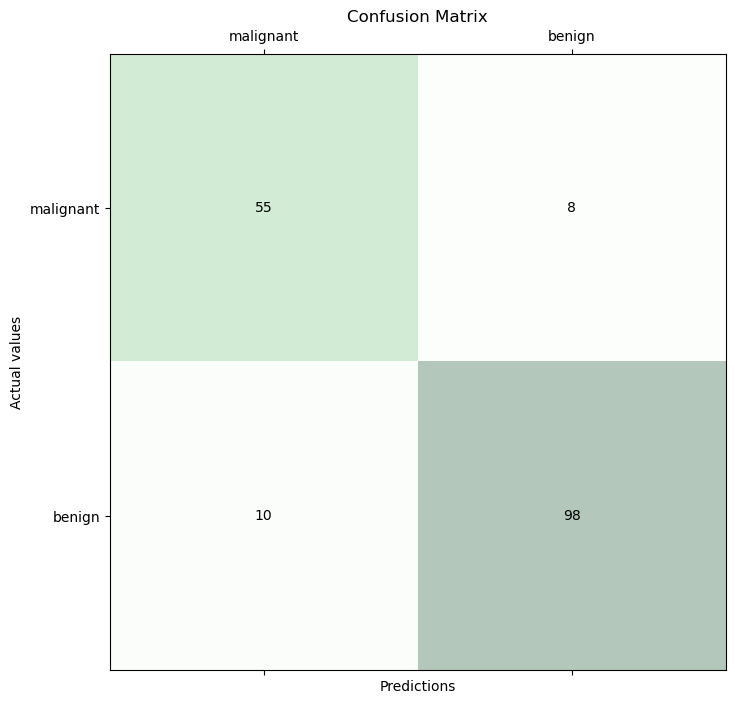

In [89]:
#### TODO: Write your code here

# Plotting confusion matrix for test data using the color coding function
color_coding_function(y_test, y_pred)


9. Find the indices of the neighbors of the first incorrect prediction of the test dataset. 

In [90]:
#### TODO: Write your code here
first_incori = i_incorpred[0]
print(f'The first incorrect index is {first_incori}')

dp = X_test[first_incori].reshape(1,-1) #reshaping datapoint in array-like shape

# Finding the neighbors of the datapoint and calculating their distances
i_dist,i_neigh = k_classifier.kneighbors(dp, return_distance= True)

#Displaying results
print(f'\nThe indices of the neighbors (in training dataset) for first incorrect prediction of test data are: \n {i_neigh}')
print(f'\nThe distances of the neighbors (in training dataset) for first incorrect prediction of test data are: \n {i_dist}')


The first incorrect index is 0

The indices of the neighbors (in training dataset) for first incorrect prediction of test data are: 
 [[358 105 114 159 290 295 108 354 100 352 304 268 258 378 273 188]]

The distances of the neighbors (in training dataset) for first incorrect prediction of test data are: 
 [[0.0442855  0.12039739 0.13393487 0.13612759 0.19719487 0.20655988
  0.21961159 0.24108295 0.24717421 0.27374042 0.28434468 0.29177427
  0.31384396 0.31455846 0.33099845 0.33998439]]


10. Show a scatter plot of the data with a unique color for each type of prediction.

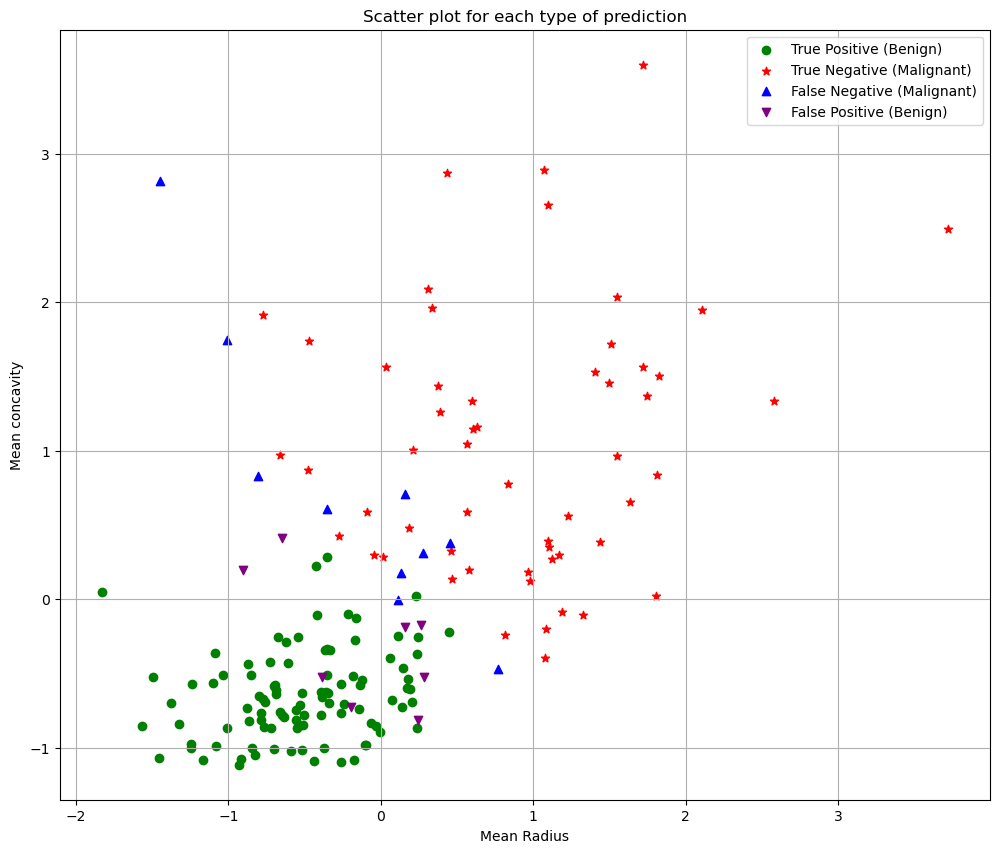

In [91]:
#### TODO: Write your code here
t_pos = []
t_neg = []
f_pos =[]
f_neg = []

for i in range(len(X_test)):
    if y_test[i] == 0 and y_test[i] == y_pred[i]:
        t_neg.append(i)
    elif y_test[i] == 0 and y_test[i] != y_pred[i]:
        f_pos.append(i)
    elif y_test[i]==1 and y_test[i] == y_pred[i]:
        t_pos.append(i)
    elif y_test[i] == 1 and y_test[i] != y_pred[i]:
        f_neg.append(i)

#Plotting scatter plot for selected features
plt.figure(figsize=(12, 10))
plt.scatter(X_test[t_pos][:,0], X_test[t_pos][:,1], marker = 'o', color = 'green' )
plt.scatter(X_test[t_neg][:,0], X_test[t_neg][:,1], marker = '*', color = 'red' )    
plt.scatter(X_test[f_neg][:,0], X_test[f_neg][:,1], marker = '^', color = 'blue')
plt.scatter(X_test[f_pos][:,0], X_test[f_pos][:,1], marker = 'v', color = 'purple')

plt.title('Scatter plot for each type of prediction')
plt.xlabel('Mean Radius')
plt.ylabel('Mean concavity')
plt.legend(labels=['True Positive (Benign)', 'True Negative (Malignant)', 'False Negative (Malignant)', 'False Positive (Benign)'])
plt.grid()
plt.show()

11. Modify the following code snippet to visualize the data in terms of a network where each node is connected to its $k$-nearest neighbors. What can you infer from it?

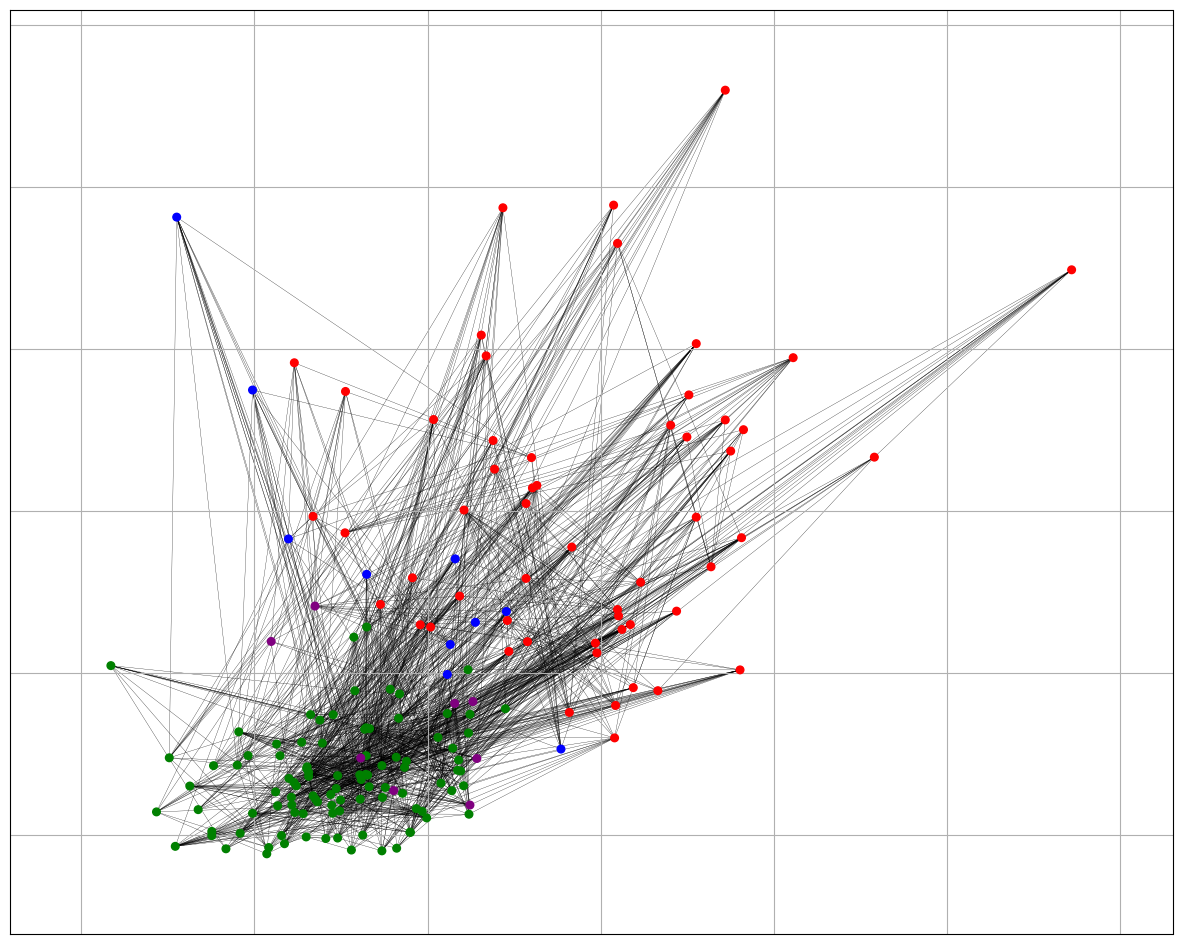

In [92]:
#### TODO: Modify the following snippet of code


import networkx as nx

X_test_cancer_bi = X_test

#### Find K-nearest neighbors of the points
weighted_sparse_matrix = k_classifier.kneighbors_graph(
    X_test_cancer_bi,   #### nodes of the network
    n_neighbors=16).toarray() #### number of neighbors

np.fill_diagonal(weighted_sparse_matrix, 0) ####set the diagonal elements as zero to avoid self-loops

adj_mat = pd.DataFrame(weighted_sparse_matrix) #### convert to a DataFrame

G = nx.from_pandas_adjacency(adj_mat) #### Create the network

plt.figure(figsize=(15,12))


# Setting node colors based on prediction type
color_code_test_knn=np.empty_like(y_test)
color_code_test_knn=color_code_test_knn.tolist()
for i in range(len(t_pos)):
  color_code_test_knn[t_pos[i]]='green' 
for i in range(len(t_neg)):
  color_code_test_knn[t_neg[i]]='red' 
for i in range(len(f_pos)):
  color_code_test_knn[f_pos[i]]='purple'
for i in range(len(f_neg)):
  color_code_test_knn[f_neg[i]]='blue' 
color_code_test_knn=np.array(color_code_test_knn, dtype='object' )

nx.draw_networkx(G,   #### network
                 pos=dict(enumerate(np.array(X_test_cancer_bi))), #### pass the locations of the nodes 
                 node_size=30,  ### node size
                 with_labels=False,  #### ignore the node labels
                 width=0.2,  #### edge width
                 node_color=color_code_test_knn #### color of the nodes
                 )

plt.grid()
#plt.xlabel('Mean Radius')
#plt.ylabel('Mean concavity')
#plt.title('Network where each node is connected to k-nearest neighbors')
plt.show()

## 3. Logistic Regression

Construct a logistic regression classifier using the `sklearn` library.

Use `random_state=0`.

In [93]:
from sklearn.linear_model import LogisticRegression

#### TODO: Write your code here
F = np.array(features.values)
X = F[:, :-1]
y = F[:,-1]

# setting random_state to 0 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Displaying shape and first 10 rows of training set
print(X_train.shape)
print(f'First 10 rows of X_train:\n {X_train[:10,:]}')

# Displaying shape and first 10 rows of test set
print(X_test.shape)
print(f'First 10 rows of X_test:\n {X_test[:10,:]}')

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

(398, 2)
First 10 rows of X_train:
 [[-0.74902829 -0.44845498]
 [-1.03304249 -0.82648516]
 [-0.5331775  -0.62711222]
 [ 1.18794852 -0.08925725]
 [-2.0296483  -1.11487284]
 [-1.23270447 -1.02913495]
 [-0.29744572 -0.54136176]
 [-0.84559312 -0.86603332]
 [ 0.27626295 -0.45536021]
 [ 1.27883307  1.79662495]]
(171, 2)
First 10 rows of X_test:
 [[-0.20656118  0.69932048]
 [-0.26052388 -0.76684905]
 [-0.03047238 -0.8528506 ]
 [ 0.03769103 -0.80413731]
 [-0.31164643 -0.79321448]
 [-0.79163042 -0.57475799]
 [-0.58998034 -0.11763149]
 [-0.68938531 -0.91612765]
 [-1.81720569 -1.11487284]
 [-1.09836575 -0.66527933]]


LogisticRegression()

1.  Predict the nature of the tumor using the test dataset.
2.  What is the mean accuracy of the classifier on the training and the test datasets?
3. What are the coefficients of the classifier? What do they mean?

In [94]:
#### TODO: Write your code here

y_pred_lr = log_reg.predict(X_test) #Predicting nature of tumor using test data
y_predtr_lr = log_reg.predict(X_train)

# Displaying the predicted values on test data
print(f'Predicted values on test data: \n {y_pred_lr}')
# Getting the mean accuracy of classifier on test and training data
mean_acc_test = log_reg.score(X_test, y_test)
mean_acc_train = log_reg.score(X_train, y_train)

# Getting the coefficients of the classifier
coeff1 = log_reg.coef_

# Displaying results
print(f'Mean accuracy of classifier on test data is: {(mean_acc_test*100):.2f}%')
print(f'Mean accuracy of classifier on train data is: {(mean_acc_train*100):.2f}%')
print(f'Coefficients of classifier are: {coeff1}')

Predicted values on test data: 
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1.]
Mean accuracy of classifier on test data is: 90.64%
Mean accuracy of classifier on train data is: 90.70%
Coefficients of classifier are: [[-2.50782612 -2.20259049]]


`The coefficients in logistic regression are the  weights for each variable that represent the estimated contribution of each feature to the predicted probability of the outcome (in case of binary classification, 0 or 1).`

4.  Find the indices of the points of the test dataset for which the model made incorrect predictions.

In [95]:
#### TODO: Write your code here

i_incorpred = [] 

# Loop to find where predictions made were incorrect
for i in range(len(X_test)):
    if y_pred_lr[i] != y_test[i]:
        i_incorpred.append(i)

print(f"The indices where predictions were incorrect are: \n {i_incorpred}")

The indices where predictions were incorrect are: 
 [10, 13, 14, 20, 35, 40, 42, 73, 91, 108, 137, 147, 151, 152, 157, 166]


5. Construct and show the confusion matrix and the classification report. What does they signify?  

In [ ]:
#### TODO: Write your code here
print(f'Confusion matrix for test data:\n{metrics.confusion_matrix(y_test, y_pred_lr)}')

test_rep = metrics.classification_report(y_test, y_pred_lr)

# Displaying classification report for test dataset
print(f"Classification report for test data")
print(test_rep)

# Using the color coding function
color_coding_function(y_test, y_pred_lr)

Confusion matrix for training data:
[[127  22]
 [ 15 234]]
Classification report for training data
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       149
         1.0       0.91      0.94      0.93       249

    accuracy                           0.91       398
   macro avg       0.90      0.90      0.90       398
weighted avg       0.91      0.91      0.91       398



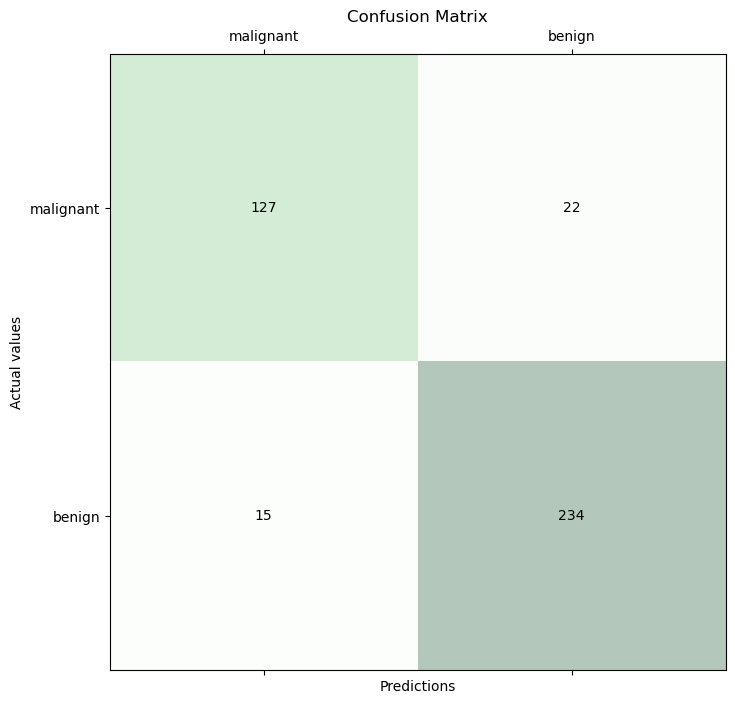

In [96]:
#### TODO: Write your code here
print(f'Confusion matrix for training data:\n{metrics.confusion_matrix(y_train, y_predtr_lr)}')

train_rep = metrics.classification_report(y_train, y_predtr_lr)

# Displaying classification report for test dataset
print(f"Classification report for training data")
print(train_rep)

# Using the color coding function
color_coding_function(y_train, y_predtr_lr)

`1. A classification report provides a summary of the performance of a logistic regression-based classifier, providing various metrics such as precision, recall, F1-score, and support for each class.`

`2. A confusion matrix provides a details of the actual and predicted class labels from a logistic regression-based classifier. It contains four values: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).`

6. Create a plot with two suplots in a row, one for the training dataset and the other for the test dataset. Each subplot shall include the following:
> 1.  Scatter plot of the data with a unique color for each type of prediction
> 2.  Decision boundary
> 3.  Legends and `other necessary details`

7. What can you infer from the plot?

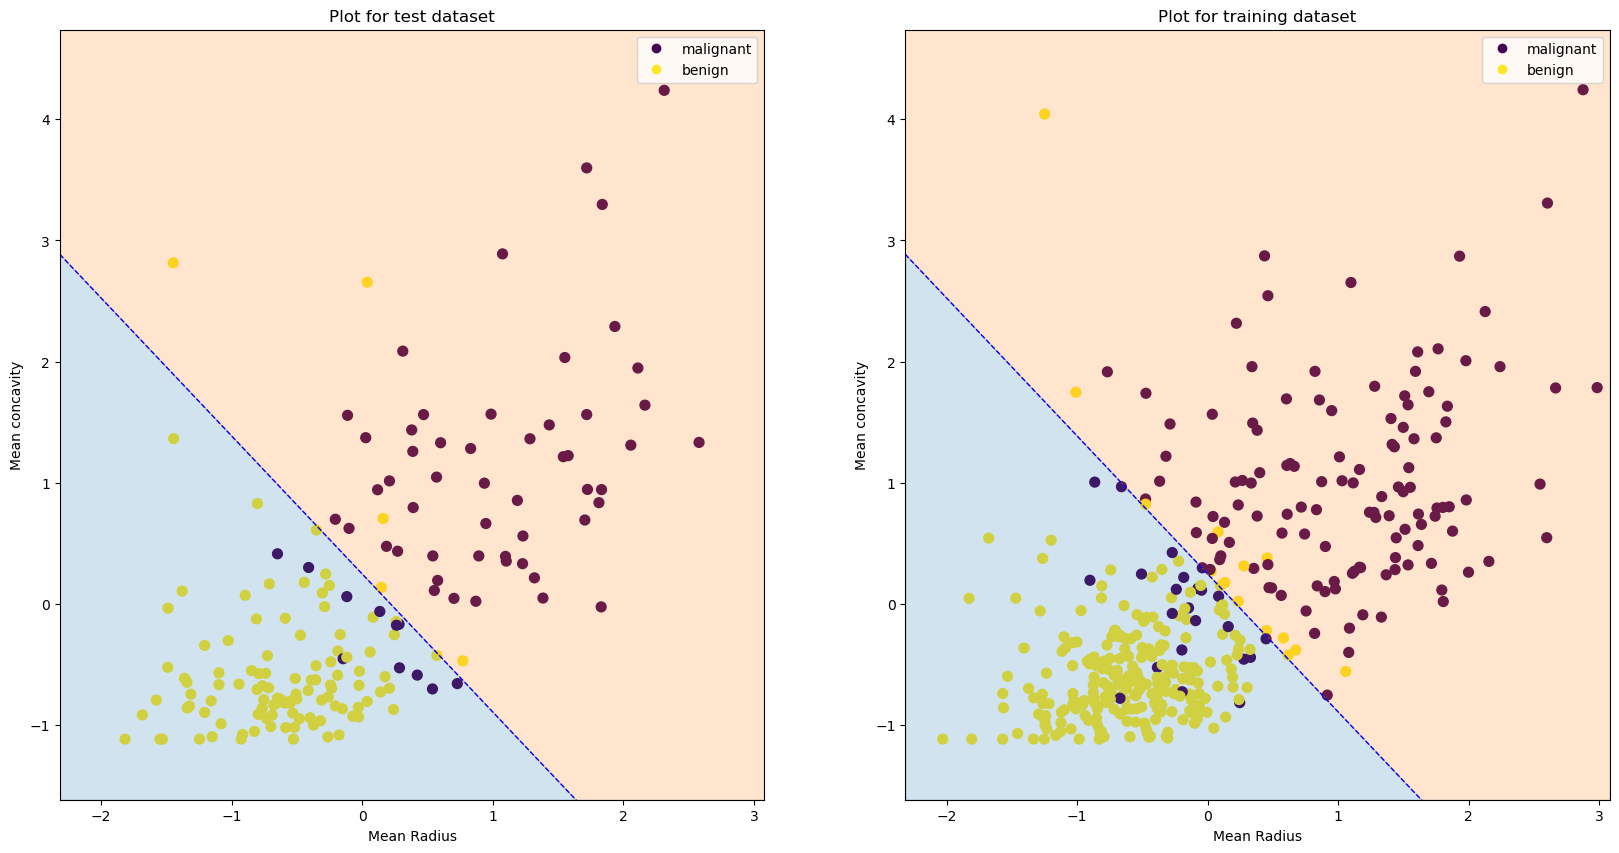

In [97]:
#### TODO: Write your code here

# Retrieve the model parameters.
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

plt.figure(figsize=(20, 10))

# Plotting for test data
plt.subplot(121)
ax = plt.gca()
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50)

#### Creating the contour plots

xmin, xmax = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
ymin, ymax = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'b', lw=1, ls='--')

plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('Mean Radius')
plt.ylabel('Mean concavity')
plt.title('Plot for test dataset')
plt.legend(handles=scatter.legend_elements()[0], labels=[bc_data['target_names'][0], bc_data['target_names'][1]])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Plotting for training data
plt.subplot(122)
ax = plt.gca()
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

#### Creating the contour plots

xmin, xmax = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
ymin, ymax = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'b', lw=1, ls='--')

plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('Mean Radius')
plt.ylabel('Mean concavity')
plt.title('Plot for training dataset')
plt.legend(handles=scatter.legend_elements()[0], labels=[bc_data['target_names'][0], bc_data['target_names'][1]])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

`1. Benign tumors tend to have smaller mean radius values`

`2. Benign tumors also tend to have lesser mean concavity values`

## 4. Support Vector Machines

1. Use the `sklearn` library to construct three support vector machine classifiers. The three classifiers are based on three kernels: `linear`, `polynomial` and `Gaussian`.

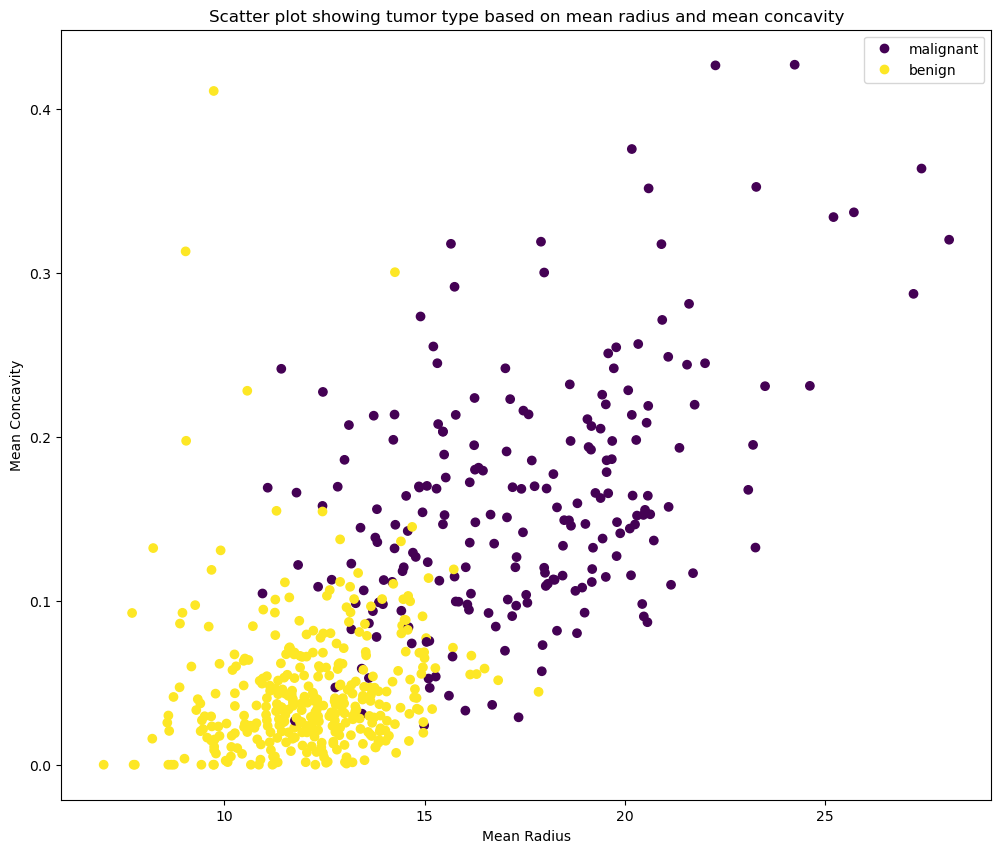

In [98]:
#### TODO: Write your code here

# Visual understanding of data for SVM
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['mean radius'], df['mean concavity'], c=df['target'])
plt.legend(handles=scatter.legend_elements()[0], labels=[bc_data['target_names'][0], bc_data['target_names'][1]])
plt.title('Scatter plot showing tumor type based on mean radius and mean concavity')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Concavity')
plt.show()

In [99]:
from sklearn.svm import SVC

# Keep regularization parameter as 10 for all three classifiers
# Constructing SVM classifier based on linear kernel and fitting model
svc_linear = SVC(kernel='linear', C=10)
svc_linear.fit(X_train, y_train)

# Constructing SVM classifier based on polynomial kernel and fitting model
svc_poly = SVC(kernel='poly', C=10)
svc_poly.fit(X_train, y_train)

# Constructing SVM classifier based on gaussian kernel and fitting model
svc_gauss = SVC(kernel='rbf', C=10)
svc_gauss.fit(X_train, y_train)

SVC(C=10)

2.  Predict the nature of the tumor in the training as well as the test dataset using each of the support vector classifier. 

In [100]:
#### TODO: Write your code here
# Predicting nature of tumor in test and training datasets using linear svc
y_pred_svml = svc_linear.predict(X_test)
y_predtr_svml = svc_linear.predict(X_train)

# Predicting nature of tumor in test and training datasets using polynomial svc
y_pred_svmp = svc_poly.predict(X_test)
y_predtr_svmp = svc_poly.predict(X_train)

# Predicting nature of tumor in test and training datasets using gaussian svc
y_pred_svmg = svc_gauss.predict(X_test)
y_predtr_svmg = svc_gauss.predict(X_train)

3. What is the accuracy of the three SVM models (based on three kernels) on the training and the test datasets?

In [101]:
#### TODO: Write your code here
print('Accuracy on Test data')
print(f'Accuracy of linear svc is {svc_linear.score(X_test, y_test)}')
print(f'Accuracy of ploynomial svc is {svc_poly.score(X_test, y_test)}')
print(f'Accuracy of gaussian svc is {svc_gauss.score(X_test, y_test)}')

print('\nAccuracy on Training data')
print(f'Accuracy of linear svc is {svc_linear.score(X_train, y_train)}')
print(f'Accuracy of ploynomial svc is {svc_poly.score(X_train, y_train)}')
print(f'Accuracy of gaussian svc is {svc_gauss.score(X_train, y_train)}')

Accuracy on Test data
Accuracy of linear svc is 0.9005847953216374
Accuracy of ploynomial svc is 0.8947368421052632
Accuracy of gaussian svc is 0.9122807017543859

Accuracy on Training data
Accuracy of linear svc is 0.9120603015075377
Accuracy of ploynomial svc is 0.8819095477386935
Accuracy of gaussian svc is 0.9346733668341709


4. Create a plot with three subplots in a row corresponding to the `linear`, `polynomial` and `Gaussian` kernels (in that order). The subplots shall include the following:
> 1.  Scatter plot of the data with a unique color for each type of prediction
> 2.  Decision boundary
> 3.  Legends and `other necessary details`

5. What can you infer from the plot?

C:\Users\vkhade\AppData\Local\Temp\ipykernel_14492\3633389951.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')
C:\Users\vkhade\AppData\Local\Temp\ipykernel_14492\3633389951.py:40: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')
C:\Users\vkhade\AppData\Local\Temp\ipykernel_14492\3633389951.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')


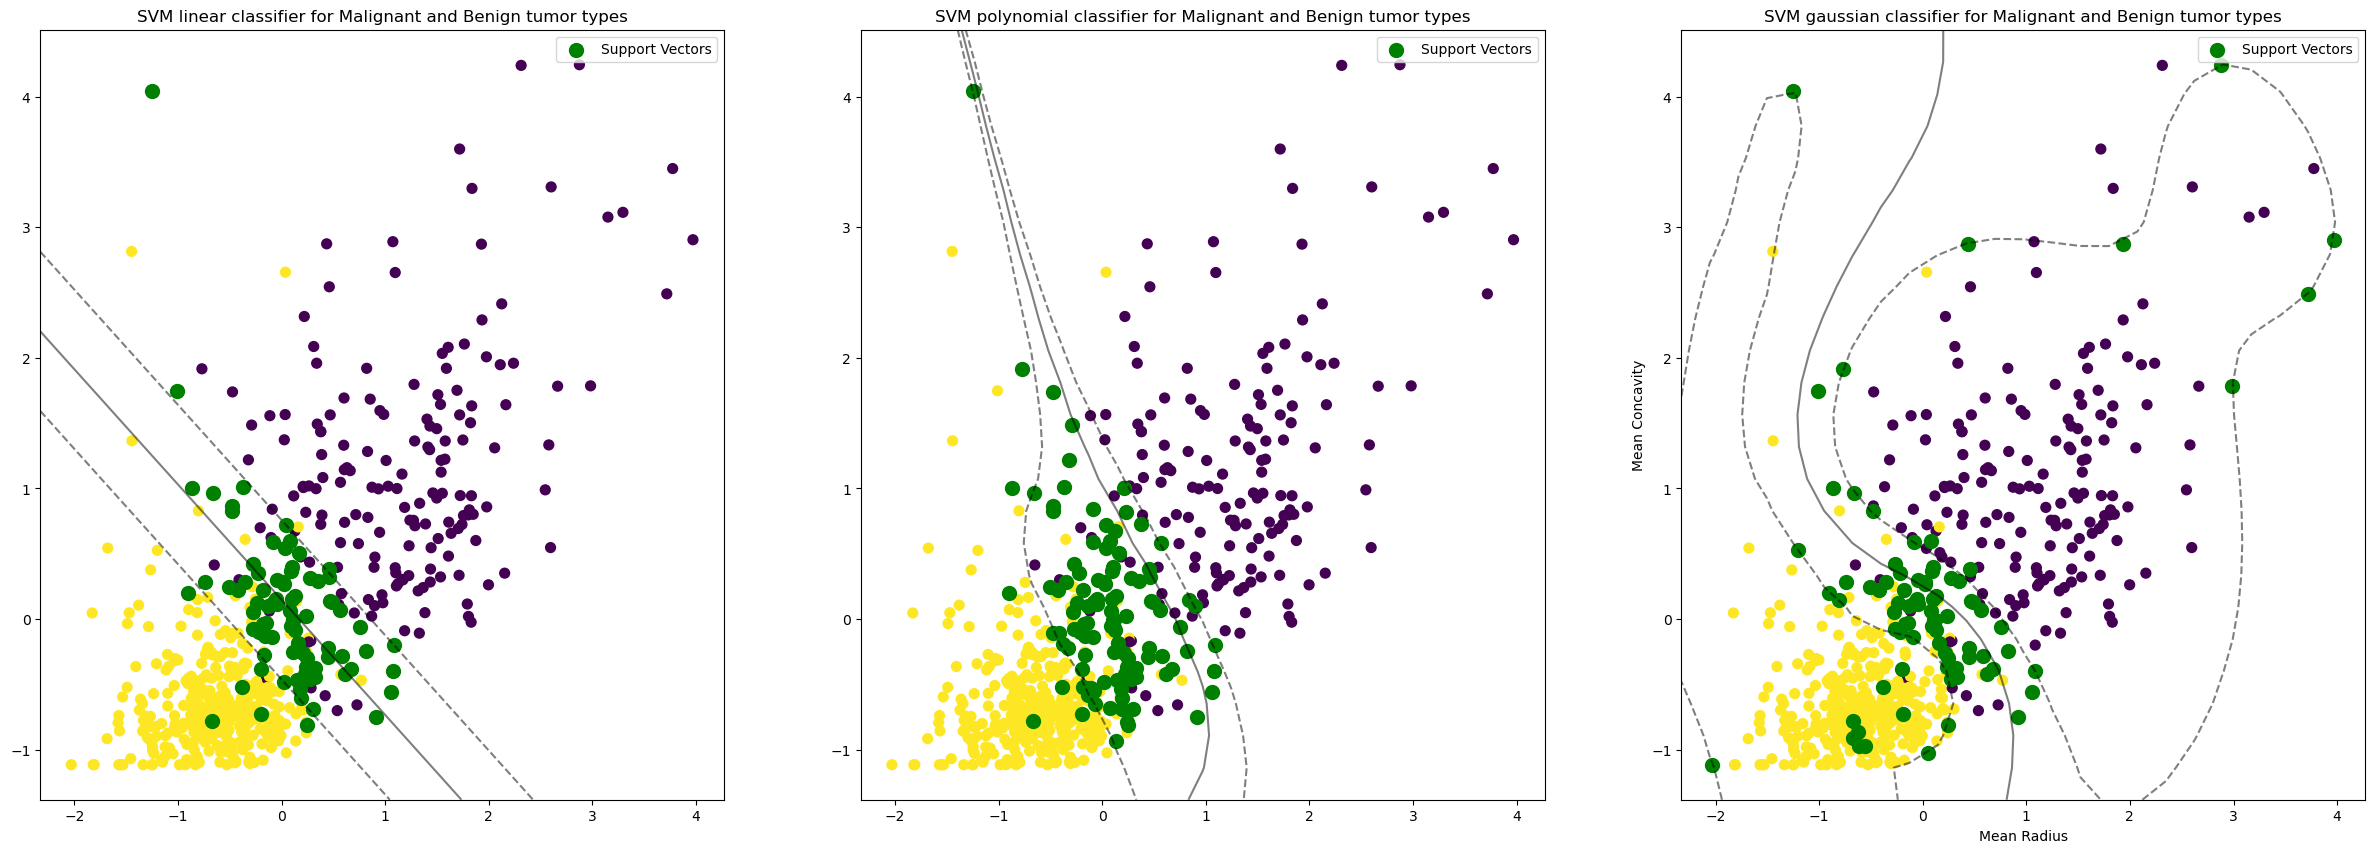

In [102]:
#### TODO: Write your code here
plt.figure(figsize=(30, 10))

# Plotting svm linear classifier
plt.subplot(131)
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#### Creating the contour plots

x_grid = np.linspace( ax.get_xlim()[0], ax.get_xlim()[1], 25 )
y_grid = np.linspace( ax.get_ylim()[0], ax.get_ylim()[1], 25 )
y_mesh, x_mesh = np.meshgrid(y_grid,x_grid)
xy = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

svc_plot = svc_linear.decision_function(xy).reshape(x_mesh.shape)

ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')

ax.scatter(svc_linear.support_vectors_[:, 0], svc_linear.support_vectors_[:, 1],  s=100, linewidth=1, facecolors='g', label='Support Vectors')
plt.title('SVM linear classifier for Malignant and Benign tumor types')

plt.legend()


# Plotting svm polynomial classifier
plt.subplot(132)
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#### Creating the contour plots

x_grid = np.linspace( ax.get_xlim()[0], ax.get_xlim()[1], 25 )
y_grid = np.linspace( ax.get_ylim()[0], ax.get_ylim()[1], 25 )
y_mesh, x_mesh = np.meshgrid(y_grid,x_grid)
xy = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

svc_plot = svc_poly.decision_function(xy).reshape(x_mesh.shape)

ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')

ax.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1],  s=100, linewidth=1, facecolors='g', label='Support Vectors')
plt.title('SVM polynomial classifier for Malignant and Benign tumor types')

plt.legend()

# Plotting for svm gaussian classifier
plt.subplot(133)
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#### Creating the contour plots

x_grid = np.linspace( ax.get_xlim()[0], ax.get_xlim()[1], 25 )
y_grid = np.linspace( ax.get_ylim()[0], ax.get_ylim()[1], 25 )
y_mesh, x_mesh = np.meshgrid(y_grid,x_grid)
xy = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

svc_plot = svc_gauss.decision_function(xy).reshape(x_mesh.shape)

ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')

ax.scatter(svc_gauss.support_vectors_[:, 0], svc_gauss.support_vectors_[:, 1],  s=100, linewidth=1, facecolors='g', label='Support Vectors')
plt.title('SVM gaussian classifier for Malignant and Benign tumor types')

plt.legend()
plt.xlabel("Mean Radius")
plt.ylabel("Mean Concavity")
plt.show()

`1. Based on the generated plots it can be inferred that Gaussian svm classifier works most accurately. The svm polynomial classifier has slightly lesser accuracy than the other two types of classifiers.`

`2. The crispness of decision boundary depends on C (regularization parameter) and overall accuracy tends to increase slightly with increase in C.`   

6. How many support vectors are there in each SVM model? What is the significance of the support vectors?

In [103]:
#### TODO: Write your code here
print(f'Number of support vectors for linear svm model is {svc_linear.support_vectors_.shape[0]}')
print(f'Number of support vectors for polynomial svm model is {svc_poly.support_vectors_.shape[0]}')
print(f'Number of support vectors for gaussian svm model is {svc_gauss.support_vectors_.shape[0]}')

Number of support vectors for linear svm model is 83
Number of support vectors for polynomial svm model is 108
Number of support vectors for gaussian svm model is 82


`1. Support vectors influence the decision boundary, margin, robustness, sparsity, and interpretability of the model` 

`2. They contribute to model effectiveness in solving classification or regression tasks`

## 5. Importance of Support Vectors 

Use the SVM model based on the `linear kernel` to illustrate the significance of the support vectors. 

Use the `Versicolor` and `Virginica` species of the Iris dataset to illustrate it. Use `petal width` and `petal length` as the only features.

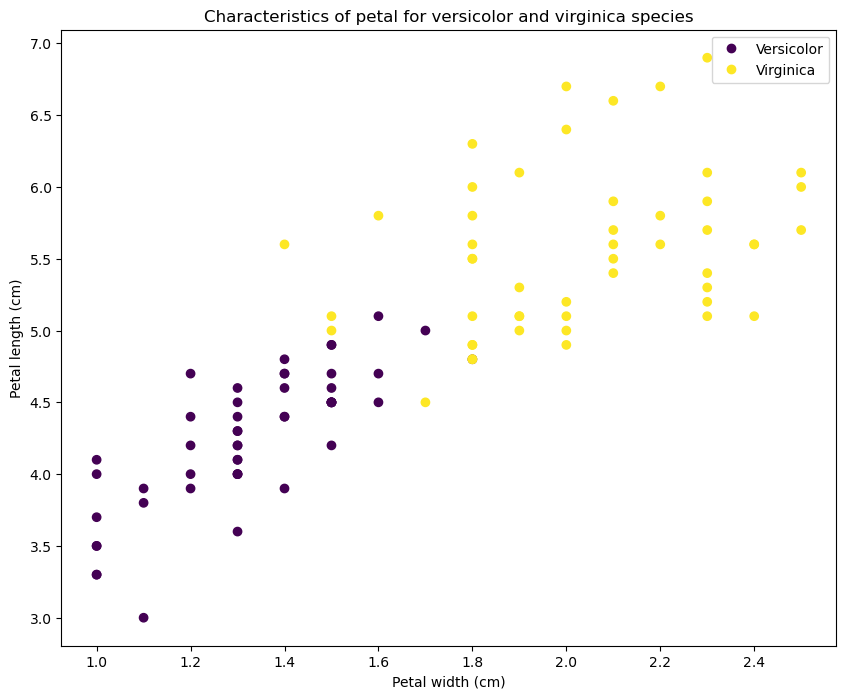

,petal width (cm),petal length (cm),iris_species
50,1.4,4.7,1.0
51,1.5,4.5,1.0
52,1.5,4.9,1.0
53,1.3,4.0,1.0
54,1.5,4.6,1.0
55,1.3,4.5,1.0
56,1.6,4.7,1.0
57,1.0,3.3,1.0
58,1.3,4.6,1.0
59,1.4,3.9,1.0


In [104]:
from sklearn.datasets import load_iris # Loading iris dataset from sklearn

#### TODO: Write your code here
iris = load_iris()
iris_df = pd.DataFrame(
    np.c_[iris['data'],iris['target']],
    columns=np.append(iris['feature_names'], 'iris_species')
)
##### Removes the the Setosa species
iris_2df = iris_df[iris_df.iris_species != 0.0] 

##### considering only two features: petal length and petal width.
iris_2df = iris_2df[['petal width (cm)','petal length (cm)','iris_species']]

# Visualizing the data
plt.figure(figsize=(10,8))
scatter = plt.scatter(iris_2df['petal width (cm)'], iris_2df['petal length (cm)'], c=iris_2df['iris_species'], )
plt.legend(handles=scatter.legend_elements()[0], labels=['Versicolor', 'Virginica'])
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Characteristics of petal for versicolor and virginica species')
plt.show()

# Displaying first 10 rows of dataset
iris_2df.head(10)

In [105]:
#### TODO: Write your code here

X, y = np.array(iris_2df.iloc[:,:-1]), np.array(iris_2df.iloc[:,-1])

# Constructing svm linear classifier
svm_linear = SVC(kernel='linear', C=10) #Taking regularization parameter as 10
# Fitting the data
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

C:\Users\vkhade\AppData\Local\Temp\ipykernel_14492\2939786167.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')


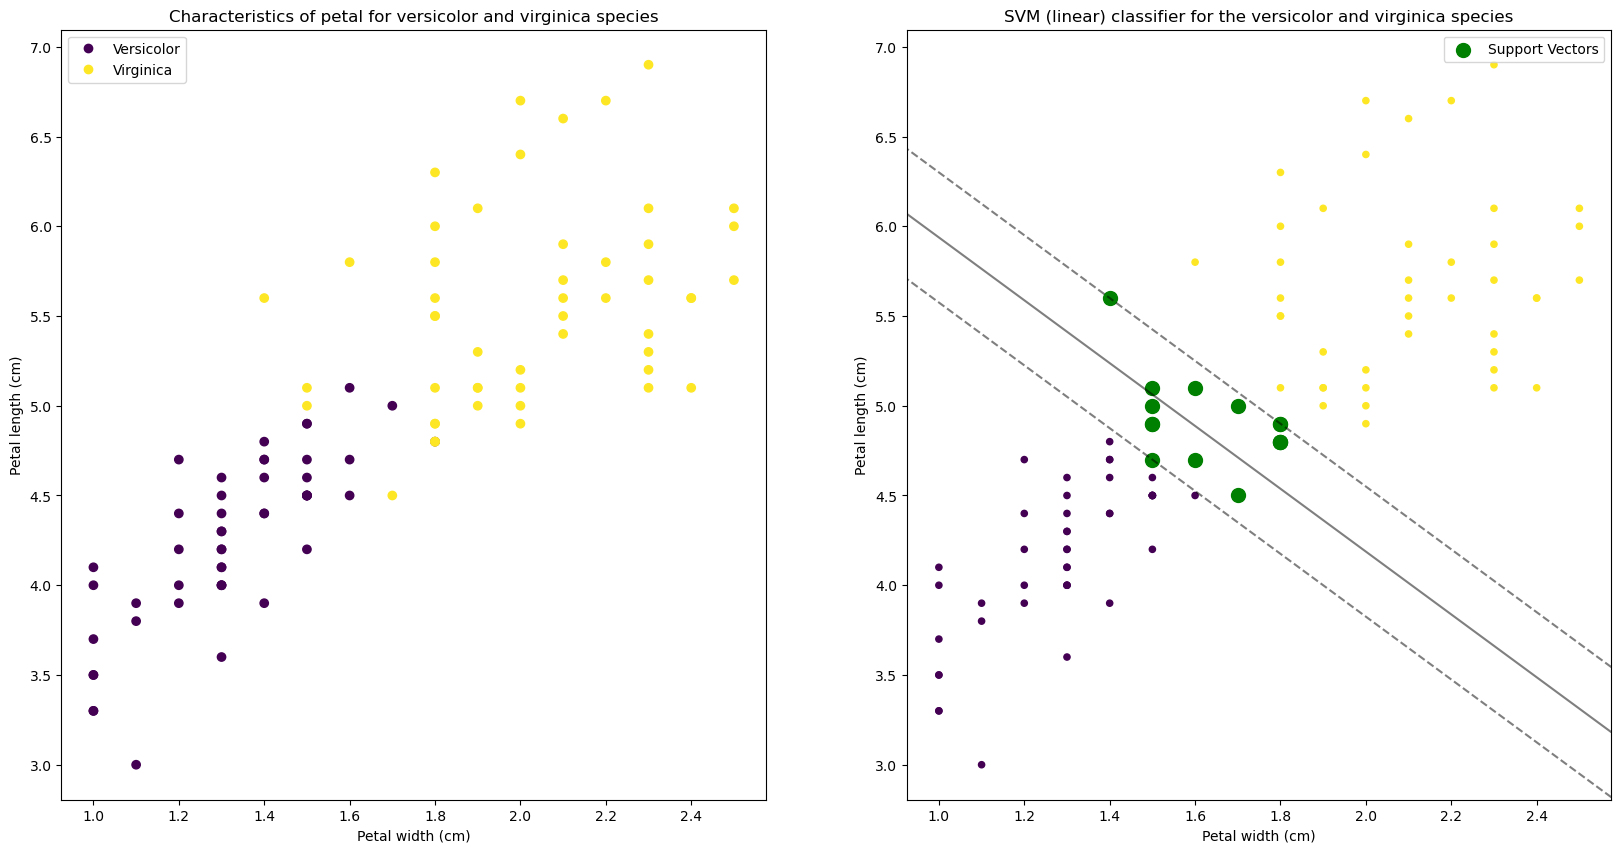

In [106]:
#### TODO: Write your code here

plt.figure(figsize=(20,10))

plt.subplot(121)
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['Versicolor', 'Virginica'])
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Characteristics of petal for versicolor and virginica species')

plt.subplot(122)
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

#### Creating the contour plots for the support vector classification

x_grid = np.linspace( ax.get_xlim()[0], ax.get_xlim()[1], 25 )
y_grid = np.linspace( ax.get_ylim()[0], ax.get_ylim()[1], 25 )
y_mesh, x_mesh = np.meshgrid(y_grid,x_grid)
xy = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

svc_plot = svm_linear.decision_function(xy).reshape(x_mesh.shape)

ax.contour(x_mesh, y_mesh, svc_plot, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='decision boundary')

ax.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],  s=100, linewidth=1, facecolors='g', label='Support Vectors')
plt.title('SVM (linear) classifier for the versicolor and virginica species')
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()


In [107]:
#### TODO: Write your code here
print(f'Accuracy of linear svm is {(svm_linear.score(X, y)*100):.2f}%')
print(f'Number of support vectors for linear svm model is {svm_linear.support_vectors_.shape[0]}')


Accuracy of linear svm is 95.00%
Number of support vectors for linear svm model is 15


`1. Support vectors influence the decision boundary, margin, robustness, sparsity, and interpretability of the model` 

`2. They contribute to model effectiveness in solving classification or regression tasks`